# Preprocessing and Dimensionality Reduction

In [29]:
#   packages
import gc

import pandas as pd
import numpy as np
from tqdm import notebook
from tqdm import tqdm
import json

from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.preprocessing import StandardScaler

import numpy as np
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

## Classifiers
from sklearn.neighbors import NearestCentroid

## prediction score
from sklearn.metrics import accuracy_score

#   my packages
from preProcessing import textProcessing

In [30]:
#   yelp_file = 'data/yelp_example_1_small.tsv'
#   yelp = pd.read_csv(yelp_file, sep='\t')
#   
#   yelp

In [31]:
#   textProc = textProcessing(base_form="lemma", pos_filter=['NOUN', 'ADV', 'ADJ', 'VERB'], clean_all=True, ngram=1)
#   
#   docs, titles, scores = [], [], []
#   data = notebook.tqdm(list(yelp.iterrows()))
#   for i, row in data:
#       tokens = textProc.filteredToken(row.content)
#       docs.append(tokens)
#       titles.append(row.business)
#       scores.append(row.score)

In [32]:
#   preProcDict = {'docs': docs, 'titles': titles, 'scores': scores}
#   
#   with open('data/yelp_example_1.json', 'w') as out:
#       json.dump(preProcDict, out)

In [33]:
preProcDict = json.load(open('data/yelp_example_1.json'))

preProcDict

{'docs': [['place',
   'waaay',
   'price',
   'generic',
   'cuisine',
   'serve',
   'aside',
   'food',
   'room',
   'temperature',
   'much',
   'well',
   'spend',
   'dollar',
   'least',
   'decent',
   'assortment',
   'sushi',
   'standard',
   'mongolian'],
  ['taxi',
   'driver',
   'tell',
   'go',
   'place',
   'thank',
   'group',
   'love',
   'food',
   'leave',
   'go',
   'back',
   'last',
   'time',
   'food',
   'fresh',
   'soooo',
   'good'],
  ['worth',
   'be',
   'buffet',
   'connoisseur',
   'high',
   'hope',
   'crown',
   'jewel',
   'downtown',
   'honestly',
   'say',
   'disappointed',
   'quality',
   'food',
   'ok',
   'selection',
   'abysmal',
   'far',
   'least',
   'amount',
   'option',
   'buffet'],
  ['great',
   'all',
   'american',
   'cuisine',
   'hearty',
   'helping',
   'fair',
   'price',
   'remind',
   'lodge',
   'definitely',
   'worth',
   'try'],
  ['bacon',
   'burger',
   'delicious',
   'burger',
   'ever',
   'eat',
   '

In [34]:
preProcDF = pd.DataFrame.from_dict(preProcDict)

preProcDF

,docs,titles,scores
0,"[place, waaay, price, generic, cuisine, serve,...",Lee's Buffet,1
1,"[taxi, driver, tell, go, place, thank, group, ...",Village Pub and Cafe,5
2,"[worth, be, buffet, connoisseur, high, hope, c...",Golden Nugget Buffet,2
3,"[great, all, american, cuisine, hearty, helpin...",Black Bear Diner,5
4,"[bacon, burger, delicious, burger, ever, eat, ...",Bacon Bar,5
...,...,...,...
4995,"[have, great, day, table, friend, decide, hit,...",Prime,5
4996,"[order, take, deliver, hotel, conference, atte...",Verona Pizza,2
4997,"[go, large, party, birthday, make, easy, make,...",Hofbräuhaus Las Vegas,4
4998,"[never, 1\/2, hour, wait, guestlist, arrive, u...",Hakkasan Nightclub,1


In [35]:
documents = preProcDF["docs"].str.join(" ")

list(documents)

['place waaay price generic cuisine serve aside food room temperature much well spend dollar least decent assortment sushi standard mongolian',
 'taxi driver tell go place thank group love food leave go back last time food fresh soooo good',
 'worth be buffet connoisseur high hope crown jewel downtown honestly say disappointed quality food ok selection abysmal far least amount option buffet',
 'great all american cuisine hearty helping fair price remind lodge definitely worth try',
 'bacon burger delicious burger ever eat bartender friendly talkative ambience nice well definitely worth visit',
 'get free margarita check generous portion delicious mexican dish',
 'special date night like fun interact staff enjoy good wine unfortunately waiter frame mind fact ruin evening diner then food par pick food leave half behind return',
 'place so go husband go downtown date night stop get dinner arepa avacado plantain pork arepa perfect usually eat bread make exception read review place be glad 

### TF_IDF

In [36]:
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(list(documents))
X_tfidf_array = X_tfidf.toarray()

X_tfidf_array.shape

(5000, 10471)

### Standardization

In [37]:
scaler = StandardScaler()
stand_X_tfidf = scaler.fit_transform(X_tfidf_array)
stand_X_tfidf

array([[-0.01869369, -0.01414355, -0.01414355, ..., -0.01414355,
        -0.01414355, -0.01414355],
       [-0.01869369, -0.01414355, -0.01414355, ..., -0.01414355,
        -0.01414355, -0.01414355],
       [-0.01869369, -0.01414355, -0.01414355, ..., -0.01414355,
        -0.01414355, -0.01414355],
       ...,
       [-0.01869369, -0.01414355, -0.01414355, ..., -0.01414355,
        -0.01414355, -0.01414355],
       [-0.01869369, -0.01414355, -0.01414355, ..., -0.01414355,
        -0.01414355, -0.01414355],
       [-0.01869369, -0.01414355, -0.01414355, ..., -0.01414355,
        -0.01414355, -0.01414355]])

### Principal Component Analysis (PCA)

In [38]:
pca = PCA().fit(stand_X_tfidf)
nc_pca  = list(range(1,1+len(pca.explained_variance_ratio_)))
ev_pca  = np.cumsum(pca.explained_variance_ratio_)

print(f'number of components: {nc_pca[::500]}')
print(f'cumulative explained variance: {ev_pca[::500].round(2)}')

number of components: [1, 501, 1001, 1501, 2001, 2501, 3001, 3501, 4001, 4501]
cumulative explained variance: [0.   0.35 0.54 0.68 0.79 0.86 0.92 0.96 0.99 1.  ]


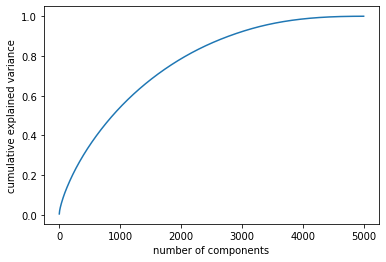

In [42]:
plt.plot(nc_pca, ev_pca)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

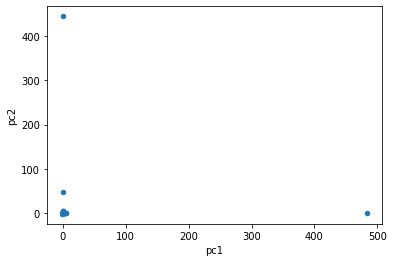

In [43]:
# Keep only the first 2 components
pca = PCA(n_components=2)
# Fit PCA and transform the data in the new coordinates
X_pca = pca.fit_transform(stand_X_tfidf)
# term-document matrix in the new coordinates
X_pca_DF = pd.DataFrame(data = X_pca, columns = ['pc1', 'pc2'])
# plot the documents in the new 2-dimesional space
X_pca_DF.plot(kind = 'scatter', x = 'pc1', y = 'pc2')
plt.show()

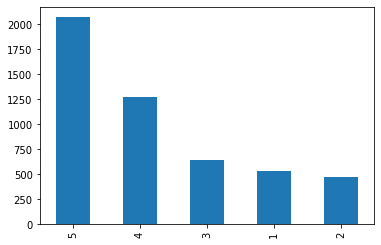

In [44]:
#It looks like we have more reviews with ratings 5, this can lead to unbalanced classes.

fig=preProcDF.scores.value_counts().plot(kind='bar')
labelFig=fig.get_figure()

<ipython-input-45-95afe7f80093>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preProcDF.binScores[preProcDF.scores<=3]=0
<ipython-input-45-95afe7f80093>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preProcDF.binScores[preProcDF.scores>=4]=1


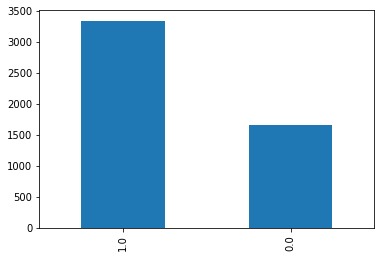

In [45]:
preProcDF["binScores"] = np.nan
preProcDF.binScores[preProcDF.scores<=3]=0
preProcDF.binScores[preProcDF.scores>=4]=1

fig=preProcDF.binScores.value_counts().plot(kind='bar')
labelFig=fig.get_figure()

In [46]:
pca_2500 = PCA(n_components=2500)
X_pca_2500 = pca_2500.fit_transform(stand_X_tfidf)

In [47]:
X_pca_2500.shape

(5000, 2500)

In [48]:
gc.collect()
labels = preProcDF.binScores.tolist()
category_list = preProcDF.binScores.unique()
X_train, X_split, y_train, y_split = train_test_split(X_pca_2500, labels, train_size=0.75, stratify=labels, random_state=1)

"""
options are the optional keyword arguments that you can use to get desired behavior:

    - train_size: is the number that defines the size of the training set, it must be between 0.0 and 1.0 and will define the share of the dataset used for testing.

    - test_size: is the number that defines the size of the test set.

    - random_state: Controls the shuffling applied to the data before applying the split. Pass an int for reproducible output across multiple function calls.

    - shuffle: Whether or not to shuffle the data before splitting. If shuffle=False then stratify must be None.

    - stratify: If not None, data is split in a stratified fashion, using this as the class labels.

"""

'\noptions are the optional keyword arguments that you can use to get desired behavior:\n\n    - train_size: is the number that defines the size of the training set, it must be between 0.0 and 1.0 and will define the share of the dataset used for testing.\n\n    - test_size: is the number that defines the size of the test set.\n\n    - random_state: Controls the shuffling applied to the data before applying the split. Pass an int for reproducible output across multiple function calls.\n\n    - shuffle: Whether or not to shuffle the data before splitting. If shuffle=False then stratify must be None.\n\n    - stratify: If not None, data is split in a stratified fashion, using this as the class labels.\n\n'

X_train.shape : (3750, 2500)
X_split.shape : (1250, 2500)
y_train len : 3750
y_split len : 1250


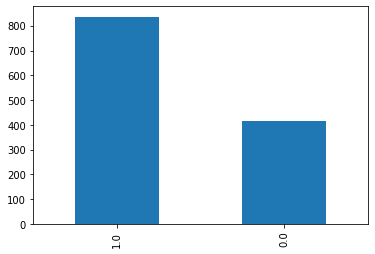

In [49]:
print(f"X_train.shape : {X_train.shape}")

print(f"X_split.shape : {X_split.shape}")

print(f"y_train len : {len(y_train)}")

print(f"y_split len : {len(y_split)}")

fig=pd.Series(y_split).value_counts().plot(kind='bar')
labelFig=fig.get_figure()

X_val.shape : (937, 2500)
X_test.shape : (313, 2500)
y_val len : 937
y_test len : 313


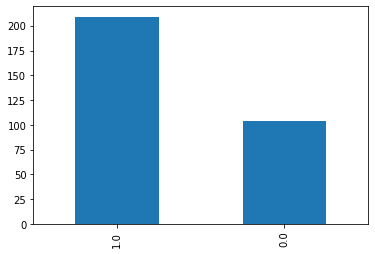

In [50]:
X_val, X_test, y_val, y_test = train_test_split(X_split, y_split, train_size=0.75, stratify=y_split, random_state=1)

print(f"X_val.shape : {X_val.shape}")

print(f"X_test.shape : {X_test.shape}")

print(f"y_val len : {len(y_val)}")

print(f"y_test len : {len(y_test)}")

fig=pd.Series(y_test).value_counts().plot(kind='bar')
labelFig=fig.get_figure()

# Rocchio classifier (NearestCentroid)

Nearest centroid classifier, when used for text classification with tf-idf vectors, this classifier is also known as the Rocchio classifier.

In [51]:
clf_Rocchio = NearestCentroid()

In [52]:
clf_Rocchio.fit(X_train, y_train)

NearestCentroid()

In [53]:
y_val_pred= clf_Rocchio.predict(X_val)

print("Accuracy:",accuracy_score(y_val, y_val_pred))

Accuracy: 0.8409818569903948


In [54]:
y_test_pred= clf_Rocchio.predict(X_test)

print("Accuracy:",accuracy_score(y_test, y_test_pred))

Accuracy: 0.8178913738019169


#### without standardization and PCA

In [58]:
gc.collect()
labels = preProcDF.binScores.tolist()
category_list = preProcDF.binScores.unique()
X_train_TfIdf, X_split_TfIdf, y_train_TfIdf, y_split_TfIdf = train_test_split(X_tfidf_array, labels, train_size=0.75, stratify=labels, random_state=1)

In [59]:
X_val_TfIdf, X_test_TfIdf, y_val_TfIdf, y_test_TfIdf = train_test_split(X_split_TfIdf, y_split_TfIdf, train_size=0.75, stratify=y_split_TfIdf, random_state=1)

In [60]:
clf_Rocchio = NearestCentroid()
clf_Rocchio.fit(X_train_TfIdf, y_train_TfIdf)

y_val_TfIdf_pred= clf_Rocchio.predict(X_val_TfIdf)
print("Accuracy:",accuracy_score(y_val_TfIdf, y_val_TfIdf_pred))

y_test_TfIdf_pred= clf_Rocchio.predict(X_test_TfIdf)
print("Accuracy:",accuracy_score(y_test_TfIdf, y_test_TfIdf_pred))

Accuracy: 0.8281750266808965
Accuracy: 0.8274760383386581


#### Multiclass

In [62]:
gc.collect()
labels = preProcDF.scores.tolist()
category_list = preProcDF.scores.unique()
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_tfidf_array, labels, train_size=0.75, stratify=labels, random_state=1)

clf_Rocchio_multi = NearestCentroid()
clf_Rocchio.fit(X_train_multi, y_train_multi)

y_test_multi_pred= clf_Rocchio.predict(X_test_multi)
print("Accuracy:",accuracy_score(y_test_multi, y_test_multi_pred))

Accuracy: 0.492
